In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import & Load Data ##

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datavidia/indonesia-commodity-price")

print("Path to dataset files:", path)

/home/my619/miniconda3/envs/supplement/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/my619/.cache/kagglehub/datasets/datavidia/indonesia-commodity-price/versions/1


In [3]:
path

'/home/my619/.cache/kagglehub/datasets/datavidia/indonesia-commodity-price/versions/1'

In [4]:
import os

os.listdir(path)

['Google Trend', 'Harga Bahan Pangan', 'Mata Uang', 'Global Commodity Price']

In [5]:
for folder in os.listdir(path):
    print(f"\n📁 {folder}")
    print(os.listdir(os.path.join(path, folder)))



📁 Google Trend
['daging ayam', 'tepung terigu', 'daging', 'cabai', 'minyak goreng', 'cabai merah', 'bawang', 'cabai rawit', 'gula', 'bawang putih', 'bawang merah', 'daging sapi', 'beras', 'telur ayam', 'tepung']

📁 Harga Bahan Pangan
['train', 'sample_submission.csv', 'test']

📁 Mata Uang
['SGDUSD=X.csv', 'USDIDR=X.csv', 'MYRUSD=X.csv', 'THBUSD=X.csv']

📁 Global Commodity Price
['US Sugar 11 Futures Historical Data.csv', 'Natural Gas Futures Historical Data.csv', 'Newcastle Coal Futures Historical Data.csv', 'Palm Oil Futures Historical Data.csv', 'US Wheat Futures Historical Data.csv', 'Crude Oil WTI Futures Historical Data.csv']


In [6]:
gt_base = os.path.join(path, "Google Trend")

google_trends = {}

for commodity in os.listdir(gt_base):
    commodity_path = os.path.join(gt_base, commodity)
    google_trends[commodity] = {}
    for file in os.listdir(commodity_path):
        # print(file)
        if file.endswith(".csv"):
            filename = file[:-4]
            google_trends[commodity][filename] = pd.read_csv(
                os.path.join(commodity_path, file)
            )

google_trends.keys()

dict_keys(['daging ayam', 'tepung terigu', 'daging', 'cabai', 'minyak goreng', 'cabai merah', 'bawang', 'cabai rawit', 'gula', 'bawang putih', 'bawang merah', 'daging sapi', 'beras', 'telur ayam', 'tepung'])

In [7]:
google_trends["beras"]["DKI Jakarta"].head()

,Date,beras
0,2022-01-01,23.810017
1,2022-01-02,29.365687
2,2022-01-03,31.746689
3,2022-01-04,30.159354
4,2022-01-05,37.302359


In [8]:
pangan_path = os.path.join(path, "Harga Bahan Pangan")
os.listdir(pangan_path)


['train', 'sample_submission.csv', 'test']

In [9]:
train_path = os.path.join(pangan_path, "train")
os.listdir(train_path)


['Gula Konsumsi.csv',
 'Telur Ayam Ras.csv',
 'Tepung Terigu (Curah).csv',
 'Cabai Merah Keriting.csv',
 'Bawang Putih Bonggol.csv',
 'Bawang Merah.csv',
 'Cabai Rawit Merah.csv',
 'Beras Premium.csv',
 'Daging Sapi Murni.csv',
 'Minyak Goreng Curah.csv',
 'Daging Ayam Ras.csv',
 'Minyak Goreng Kemasan Sederhana.csv',
 'Beras Medium.csv']

In [10]:
train_dfs = {}

for file in os.listdir(train_path):
    filename = file[:-4]
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(train_path, file))
        # df["source_file"] = file
        train_dfs[filename] = df

train_dfs.keys()
train_dfs["Gula Konsumsi"].head()
train_dfs["Gula Konsumsi"].head()


,Date,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
0,2022-01-01,13520.0,12670.0,13240.0,13280.0,12590.0,14480.0,13610.0,12950.0,13150.0,...,14780.0,13030.0,13780.0,13120.0,14170.0,14000.0,14090.0,13440.0,12990.0,13960.0
1,2022-01-02,13540.0,12710.0,12920.0,13160.0,12590.0,14000.0,13440.0,13000.0,13210.0,...,15490.0,12950.0,13640.0,13170.0,14020.0,13680.0,13990.0,13370.0,12980.0,13950.0
2,2022-01-03,13430.0,12800.0,13080.0,13210.0,12590.0,14320.0,13610.0,12950.0,13200.0,...,15330.0,12990.0,13550.0,13120.0,14160.0,13730.0,14020.0,13350.0,12970.0,13710.0
3,2022-01-04,13580.0,12800.0,13180.0,13300.0,12590.0,14320.0,13500.0,12950.0,13230.0,...,14630.0,13070.0,13640.0,13180.0,14430.0,13790.0,13990.0,13350.0,12980.0,13710.0
4,2022-01-05,13460.0,12780.0,13060.0,13320.0,12870.0,14320.0,13490.0,12950.0,13200.0,...,15210.0,13170.0,13640.0,13200.0,14430.0,13810.0,13880.0,13360.0,12980.0,13750.0


In [11]:
train_dfs["Gula Konsumsi"]["Date"].nunique()

1004

In [12]:
train_dfs.keys()

dict_keys(['Gula Konsumsi', 'Telur Ayam Ras', 'Tepung Terigu (Curah)', 'Cabai Merah Keriting', 'Bawang Putih Bonggol', 'Bawang Merah', 'Cabai Rawit Merah', 'Beras Premium', 'Daging Sapi Murni', 'Minyak Goreng Curah', 'Daging Ayam Ras', 'Minyak Goreng Kemasan Sederhana', 'Beras Medium'])

In [13]:
# set Date as index
for comm in train_dfs.keys():
    df = train_dfs[comm]
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date")
    train_dfs[comm] = df.sort_index()

In [14]:
train_dfs["Gula Konsumsi"].head()

,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,13520.0,12670.0,13240.0,13280.0,12590.0,14480.0,13610.0,12950.0,13150.0,12680.0,...,14780.0,13030.0,13780.0,13120.0,14170.0,14000.0,14090.0,13440.0,12990.0,13960.0
2022-01-02,13540.0,12710.0,12920.0,13160.0,12590.0,14000.0,13440.0,13000.0,13210.0,12670.0,...,15490.0,12950.0,13640.0,13170.0,14020.0,13680.0,13990.0,13370.0,12980.0,13950.0
2022-01-03,13430.0,12800.0,13080.0,13210.0,12590.0,14320.0,13610.0,12950.0,13200.0,12680.0,...,15330.0,12990.0,13550.0,13120.0,14160.0,13730.0,14020.0,13350.0,12970.0,13710.0
2022-01-04,13580.0,12800.0,13180.0,13300.0,12590.0,14320.0,13500.0,12950.0,13230.0,12670.0,...,14630.0,13070.0,13640.0,13180.0,14430.0,13790.0,13990.0,13350.0,12980.0,13710.0
2022-01-05,13460.0,12780.0,13060.0,13320.0,12870.0,14320.0,13490.0,12950.0,13200.0,12680.0,...,15210.0,13170.0,13640.0,13200.0,14430.0,13810.0,13880.0,13360.0,12980.0,13750.0


In [15]:
test_path = os.path.join(pangan_path, "test")

test_dfs = {}

for file in os.listdir(test_path):
    filename = file[:-4]
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(test_path, file))
        test_dfs[filename] = df

test_dfs.keys()
test_dfs["Gula Konsumsi"].head()
(test_dfs["Cabai Rawit Merah"].nunique() != 1).sum()

np.int64(1)

Now, Let's see one commodity, which is Beras Medium 

In [16]:
comm_1 = "Beras Medium"
beras_medium_train = train_dfs[comm_1]
beras_medium_train.columns.value_counts().sum()

np.int64(34)

In [17]:
for city in beras_medium_train.columns:
    print(f"{city}: {beras_medium_train[city].isna().sum()} missing values")
    # get the percentage
    perc_missing = beras_medium_train[city].isna().sum() / len(beras_medium_train) * 100
    print(f"{city}: {perc_missing:.2f}% missing values")
    # impute the missing values
    beras_medium_train[city] = beras_medium_train[city].fillna(method='ffill')
    print(f"{city}: {beras_medium_train[city].isna().sum()} missing values")


Aceh: 37 missing values
Aceh: 3.69% missing values
Aceh: 0 missing values
Bali: 36 missing values
Bali: 3.59% missing values
Bali: 0 missing values
Banten: 37 missing values
Banten: 3.69% missing values
Banten: 0 missing values
Bengkulu: 37 missing values
Bengkulu: 3.69% missing values
Bengkulu: 0 missing values
DI Yogyakarta: 36 missing values
DI Yogyakarta: 3.59% missing values
DI Yogyakarta: 0 missing values
DKI Jakarta: 37 missing values
DKI Jakarta: 3.69% missing values
DKI Jakarta: 0 missing values
Gorontalo: 35 missing values
Gorontalo: 3.49% missing values
Gorontalo: 0 missing values
Jambi: 38 missing values
Jambi: 3.78% missing values
Jambi: 0 missing values
Jawa Barat: 37 missing values
Jawa Barat: 3.69% missing values
Jawa Barat: 0 missing values
Jawa Tengah: 34 missing values
Jawa Tengah: 3.39% missing values
Jawa Tengah: 0 missing values
Jawa Timur: 35 missing values
Jawa Timur: 3.49% missing values
Jawa Timur: 0 missing values
Kalimantan Barat: 36 missing values
Kalimanta

/tmp/ipykernel_314696/2446862490.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  beras_medium_train[city] = beras_medium_train[city].fillna(method='ffill')


In [18]:
beras_medium_train.columns

Index(['Aceh', 'Bali', 'Banten', 'Bengkulu', 'DI Yogyakarta', 'DKI Jakarta',
       'Gorontalo', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah',
       'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Bangka Belitung',
       'Kepulauan Riau', 'Lampung', 'Maluku Utara', 'Maluku',
       'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua Barat', 'Papua',
       'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah',
       'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat',
       'Sumatera Selatan', 'Sumatera Utara'],
      dtype='object')

In [19]:
len(beras_medium_train.columns)

34

In [20]:
jawa = ["Bali", "Banten", "DI Yogyakarta", "DKI Jakarta", "Jawa Barat", "Jawa Tengah", "Jawa Timur"]
sumatera = ["Aceh", "Jambi", "Kepulauan Bangka Belitung", "Kepulauan Riau", "Lampung", "Riau", "Sumatera Barat", "Sumatera Selatan", "Sumatera Utara", "Bengkulu"]
kalimantan = ["Kalimantan Barat", "Kalimantan Selatan", "Kalimantan Tengah", "Kalimantan Timur", "Kalimantan Utara"]
sulawesi = ["Gorontalo", "Sulawesi Barat", "Sulawesi Selatan", "Sulawesi Tengah", "Sulawesi Tenggara", "Sulawesi Utara"]
mapana = ["Maluku", "Maluku Utara", "Papua", "Papua Barat", "Nusa Tenggara Barat", "Nusa Tenggara Timur"]

# get how many element in all those lists
provinces = {
    "jawa": jawa,
    "sumatera": sumatera,
    "kalimantan": kalimantan,
    "sulawesi": sulawesi,
    "mapana": mapana
}

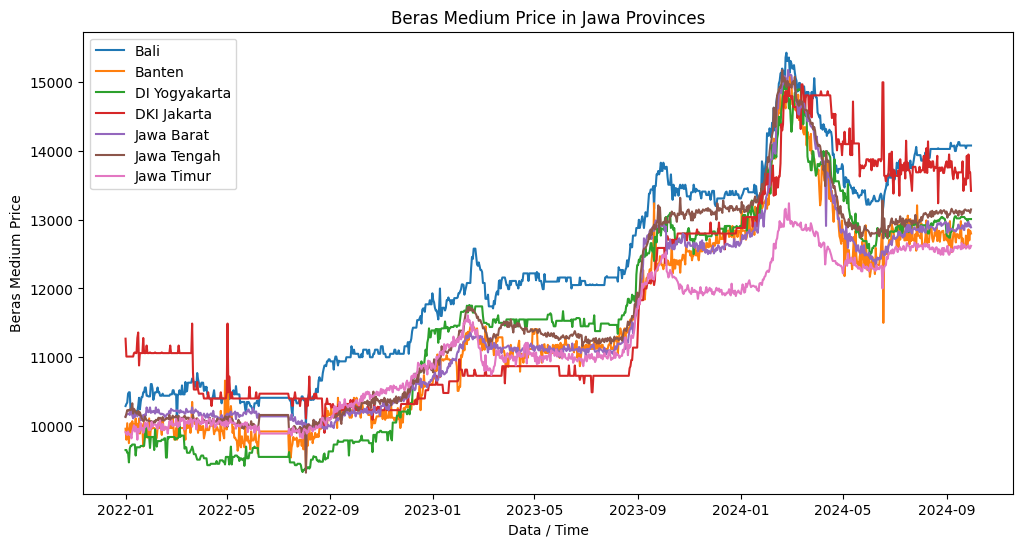

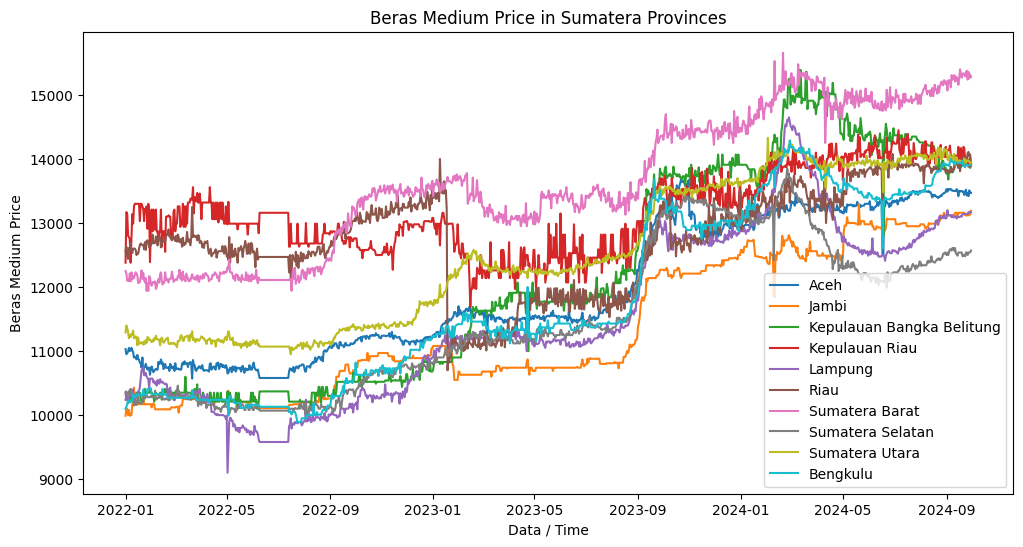

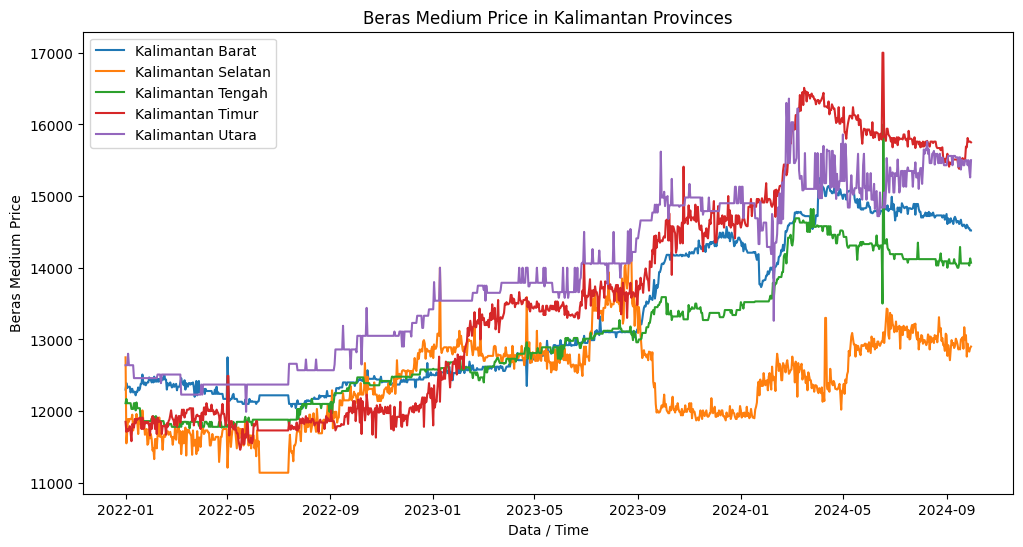

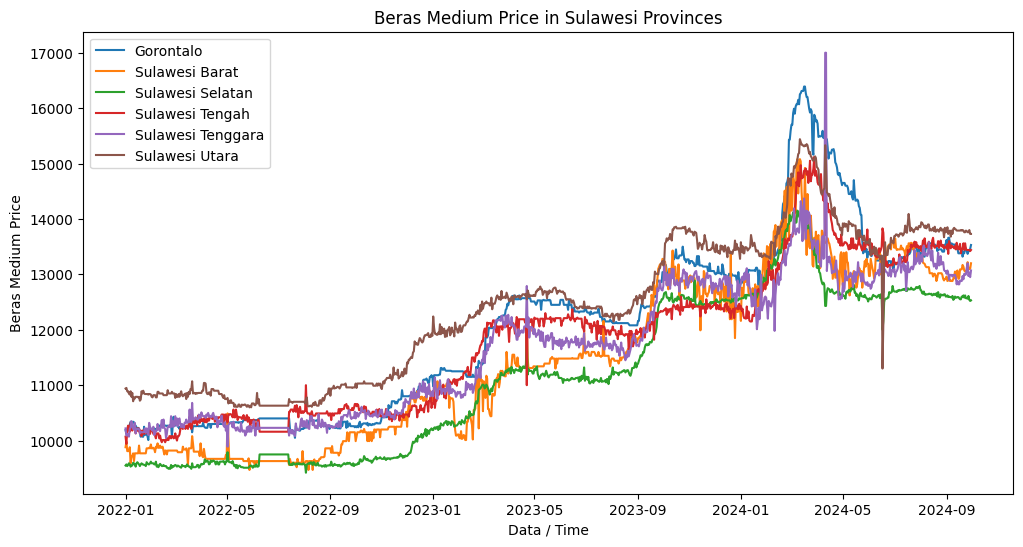

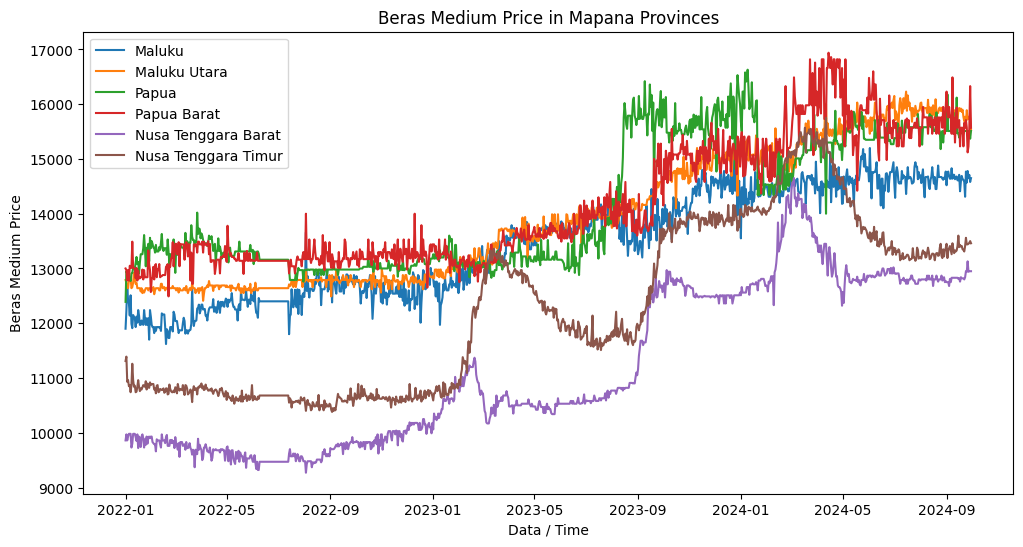

In [21]:
# plot time series for all the cities, plot in the same figure

for key, value in provinces.items():
    figure = plt.figure(figsize=(12, 6))
    ax = figure.add_subplot(1, 1, 1)
    for city in value:
        ax.plot(beras_medium_train[city], label=city)

        ax.set_ylabel('Beras Medium Price')
        ax.set_xlabel('Data / Time')
        ax.legend()
    plt.title(f'Beras Medium Price in {key.capitalize()} Provinces')
    plt.show()

### Province Level Time Series Analysis ###

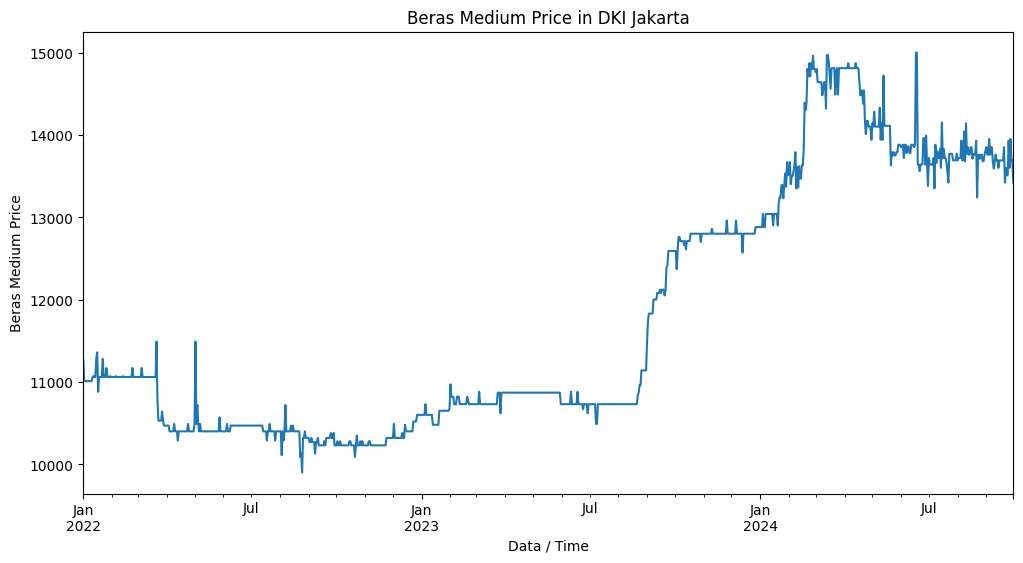

In [22]:
prov = "DKI Jakarta"
beras_medium_train[prov].plot(figsize=(12, 6))
plt.title(f'Beras Medium Price in {prov}')
plt.ylabel('Beras Medium Price')
plt.xlabel('Data / Time')
plt.show()

In [23]:
df = beras_medium_train[[prov]]

diffs = df.index.to_series().diff().dropna()

print(diffs.value_counts().head())
print("Most common interval:", diffs.mode()[0])

Date
1 days    1003
Name: count, dtype: int64
Most common interval: 1 days 00:00:00


In [24]:
exp_frequency = pd.to_timedelta("1d")
gap = df.index.to_series().diff() != exp_frequency

if gap.any():
    print(f"Gaps found: {gap.sum()} missing intervals")
else:
    print("No gaps found.")

Gaps found: 1 missing intervals


In [25]:
df = df.asfreq('D')
print('Missing after asfreq:', int(df.isna().sum()))

Missing after asfreq: 0


/tmp/ipykernel_314696/3055830626.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Missing after asfreq:', int(df.isna().sum()))


Let's do temporal splitting (20%)

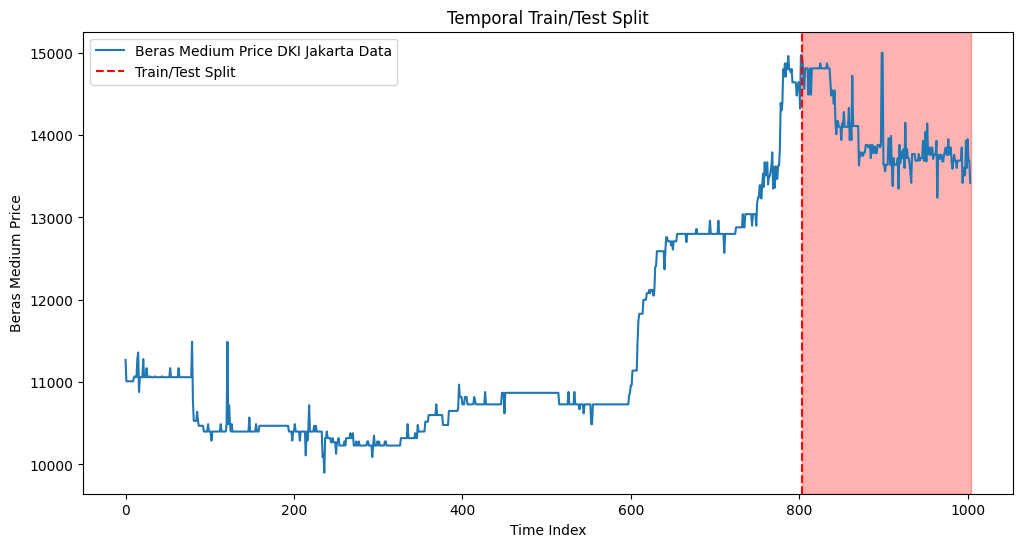

In [26]:
split_idx = int(len(df) * 0.8)
train, test = df.iloc[:split_idx], df.iloc[split_idx:]

plt.figure(figsize=(12, 6))
plt.plot(df.values, label=f'Beras Medium Price {prov} Data')
plt.axvline(x=split_idx, color='r', linestyle='--', label='Train/Test Split')
plt.axvspan(split_idx, len(df), color='red', alpha=0.3)
plt.legend()
plt.title('Temporal Train/Test Split')
plt.xlabel('Time Index')
plt.ylabel('Beras Medium Price')
plt.show()

Look at the stationarity

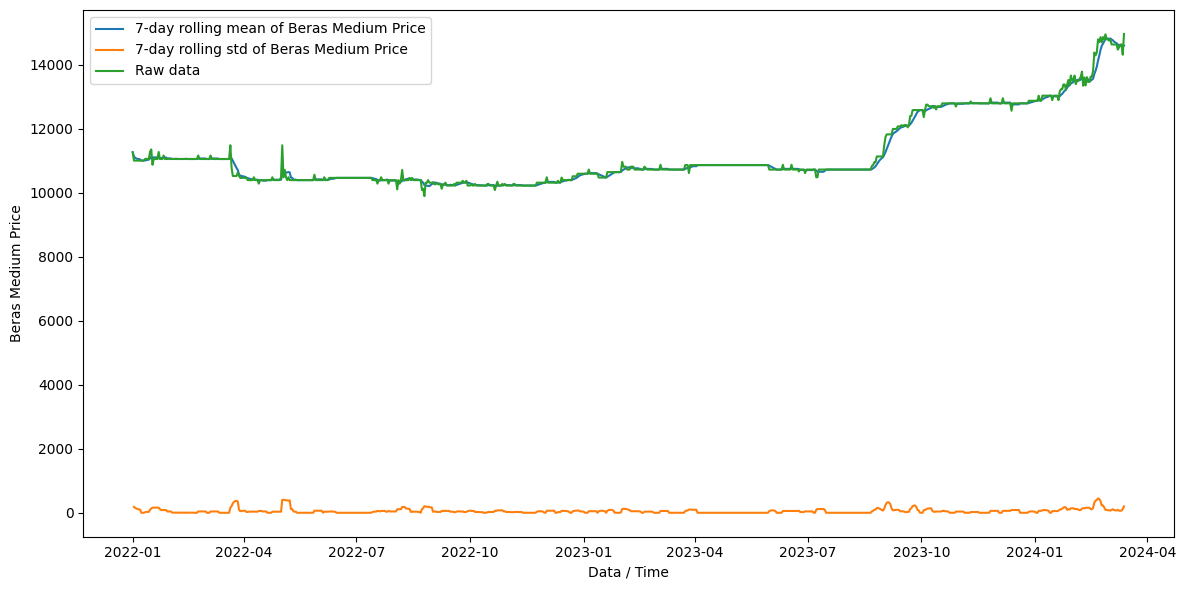

In [27]:
rolling_price = train.rolling(window='7d').mean()
rolling_std = train.rolling(window='7d').std()

figure = plt.figure(figsize=(12, 6))

plt.plot(rolling_price, label='7-day rolling mean of Beras Medium Price')
plt.plot(rolling_std, label='7-day rolling std of Beras Medium Price')
plt.plot(train, label='Raw data')
plt.ylabel('Beras Medium Price')
plt.xlabel('Data / Time')
plt.legend()
plt.tight_layout()
plt.show()

From this plot we could see that the mean is drifting and std changes, hence not stationary. But we should check it more with statistical instrument as below.

Let's do a Dickey-Fuller (Statistical) Test to see if it is stationary

In [28]:
from statsmodels.tsa.stattools import adfuller

adf_stats, pvalue, *_ = adfuller(train)

In [29]:
print('ADF statistic:', adf_stats)
print('p-value:', pvalue)

ADF statistic: 2.453557905478634
p-value: 0.9990333259000563


Because the p-value is not small (<0.05), we could not reject the H0 (Not stationary) hypothesis. Hence the series is non-stationary.

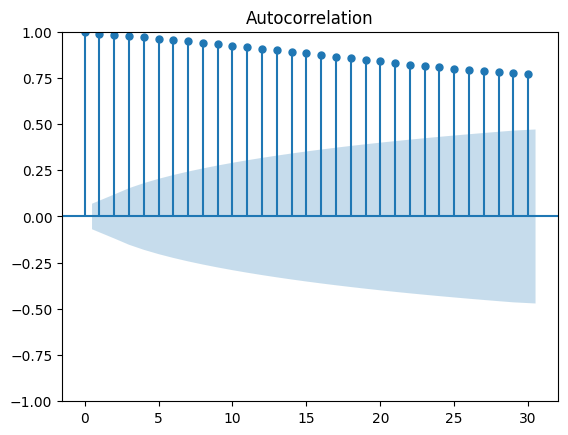

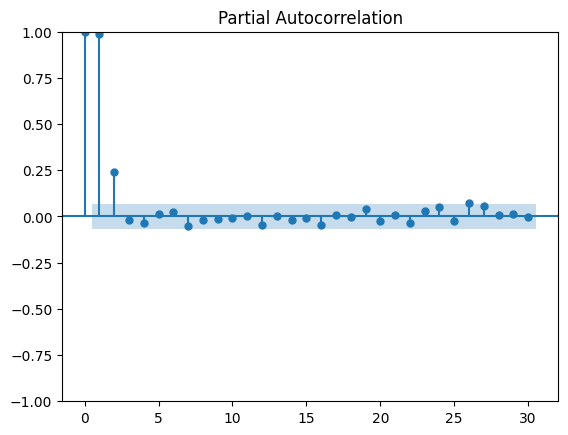

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train)
plot_pacf(train)
plt.show()

Looking at the PACF and ACF plot above, we could see that in the ACF plot there is a slow decay that implies the series have a long memory, non-stationary and need differencing. 

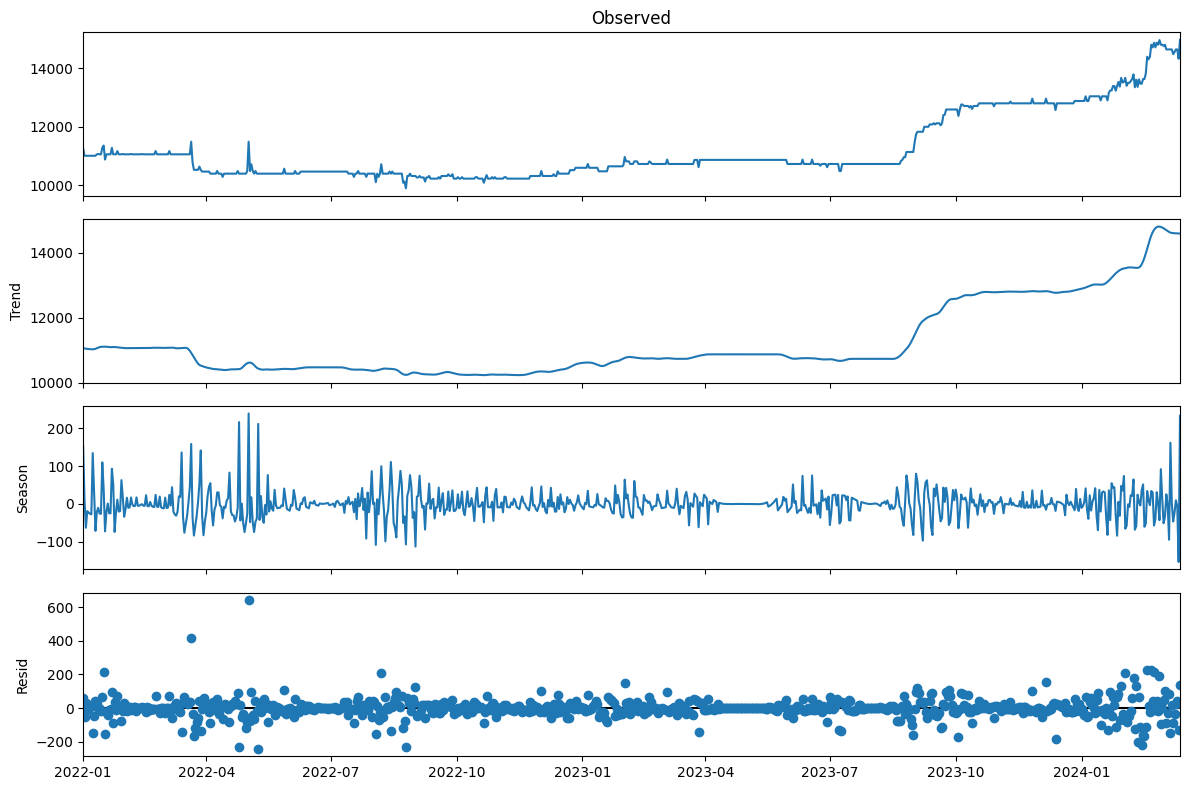

In [31]:
from statsmodels.tsa.seasonal import STL

stl = STL(train, period=7).fit()
stl.plot().set_size_inches(12, 8)
plt.tight_layout()
# plt.xticks(rotation=45)
plt.show()

We could see from the decomposition there is a seasonality term, but it is irregular, changing in amplitudes, we should cross check later to see whether the pattern is repeating in lags 7, 14, or 28 (inferred period of seasonality).

Now let's do difference with order 1

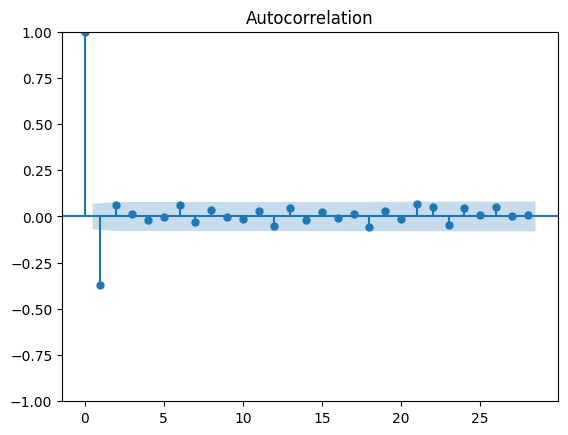

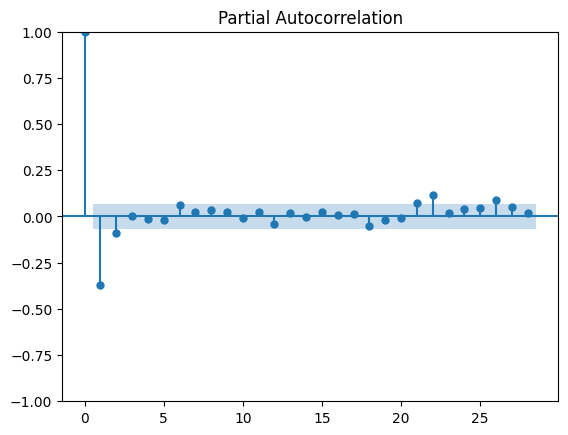

In [32]:
diff_1 = train.diff(1).dropna()

plot_acf(diff_1, lags=7 * 4)
plot_pacf(diff_1, lags=7 * 4)
plt.show()

From the PACF curve that shows the AR behaviour, we could determine the p value which is 1, hence AR(1) behaviour. From ACF curve, we could see that it also have an value of q equals 1 hence MA(1) behaviour.

In [33]:
adf_stats, pvalue, *_ = adfuller(diff_1)
print('ADF statistic:', adf_stats)
print('p-value:', pvalue)

ADF statistic: -25.580615672949346
p-value: 0.0


From the ADF test we also could see that differencing with an order 1 have make the data stationary.

We could detect seasonality by extending the lags into 60, in hoping to see the whether seasonility exist in lags 7, 14, or 28.

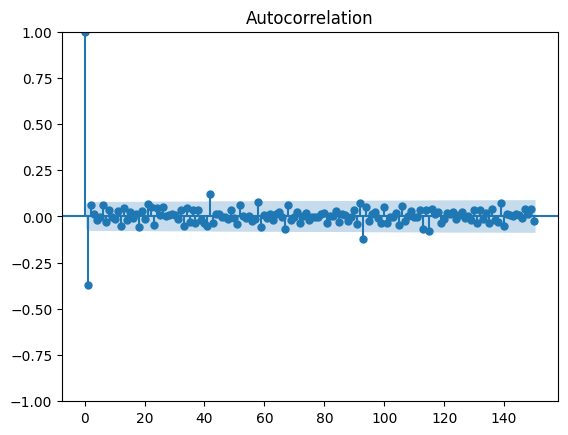

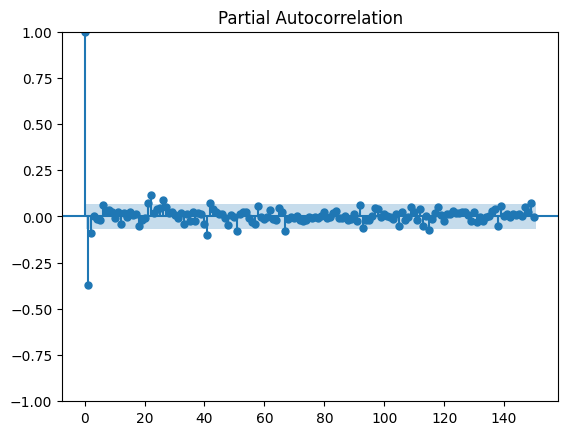

In [34]:
plot_acf(diff_1, lags=150)
plot_pacf(diff_1, lags=150)
plt.show()

From the plot above we could see no spikes in lags 7, 14, or 28. Hence no strong enough seasonality and we could safely use ARIMA to make a prediction.

In [35]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train, order=(1, 1, 1))
fit_arima = model_arima.fit()
forecast_arima = fit_arima.forecast(steps=len(test))
print(f"AIC for (1,1,1) : {fit_arima.aic}, BIC for (1,1,1): {fit_arima.bic}")

AIC for (1,1,1) : 9587.142516229924, BIC for (1,1,1): 9601.203842053523


In [36]:
forecast_arima

2024-03-14    14721.256208
2024-03-15    14776.047694
2024-03-16    14763.978621
2024-03-17    14766.637109
2024-03-18    14766.051517
                  ...     
2024-09-26    14766.157223
2024-09-27    14766.157223
2024-09-28    14766.157223
2024-09-29    14766.157223
2024-09-30    14766.157223
Freq: D, Name: predicted_mean, Length: 201, dtype: float64

In [37]:
fit_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            DKI Jakarta   No. Observations:                  803
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4790.571
Date:                Wed, 24 Dec 2025   AIC                           9587.143
Time:                        21:54:44   BIC                           9601.204
Sample:                    01-01-2022   HQIC                          9592.544
                         - 03-13-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2203      0.053     -4.127      0.000      -0.325      -0.116
ma.L1         -0.2047      0.053     -3.835      0.000      -0.309      -0.100
sigma2      9018.7259    117.995     76.433      0.000    8787.460    9249.992
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             24926.65
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             1.80
Prob(H) (two-sided):                  0.22   Kurtosis:                        30.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

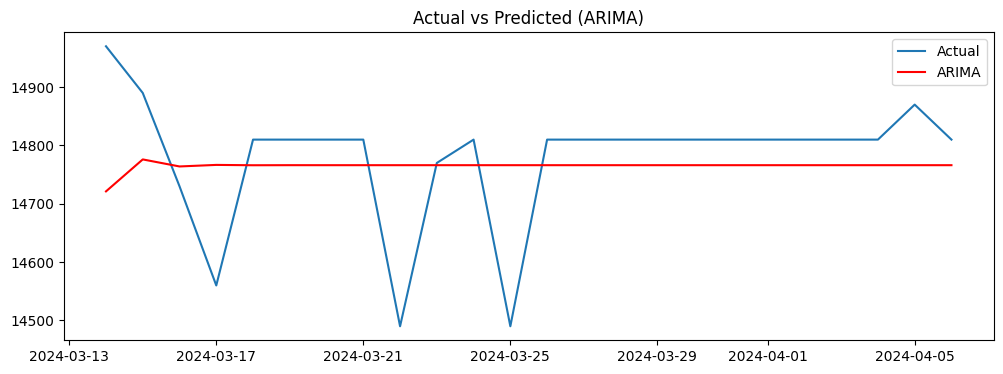

In [38]:
plt.figure().set_size_inches(12,4)
plt.plot(test[:24], label='Actual')
plt.plot(forecast_arima[:24], label='ARIMA', color='red')
plt.title('Actual vs Predicted (ARIMA)')
plt.legend()
plt.show()

As we can see that ARIMA predict the price linearly. This is not representable enough for us. Hence, we should use another model to predict a more representable and accurate prediction.

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def eval_metric(obs, pred, label):
    rmse = np.sqrt(mean_squared_error(obs, pred))
    mae = mean_absolute_error(obs, pred)
    rel_mae = mae / np.mean(obs) * 100
    print(f"For {label}: RMSE is {rmse}, MAE is {mae}, Relative MAE is {rel_mae}")

In [90]:
eval_metric(test, forecast_arima, "ARIMA")

For ARIMA: RMSE is 871.4079521692262, MAE is 778.0444651489747, Relative MAE is 5.5538092403694765


We got a Relative MAE of 5.5% compared to the mean price value. Let's see if we can reduce this error using another model.

## XGBoost ##

In [41]:
df.head()

,DKI Jakarta
Date,
2022-01-01,11270.0
2022-01-02,11010.0
2022-01-03,11010.0
2022-01-04,11010.0
2022-01-05,11010.0


First, we need to make an augmented features from our existing data (which is only price). As an intuition, to predict something we need to know:
1) Where is the price now? (state/regime)
2) Which direction is it moving? (momentum/pressure)
3) How unstable is the market? (risk/shock)

To answer this, we augment a feature as below:
- `lag 1 or 2` (Yesterday / The day before price), which is the current state of the market, it supposed to anchor today's pricing decision
- `delta` (Today's price change), it captures the momentum, kind of the velocity of the price
- `delta_lag_1 or 2` (Recent price movement history), it detects persistence (e.g. "price keep rising")
- `rolling_mean_window` (Short time trend level), it defines the local regime 
- `rolling_std_window` (Short time price volatility), Helps model adjust error tolerance, it differs from direction, but it affects the price movement
- `delta_rm_window` (Sustained price pressure), it help filters one day noise and captures inflationary/deflationary phase
- `delta_rs_window` (Volatility of price change), helps model adjust error tolerance and distinguish between smooth trend & panic/shocks period
- `shock_1` (Shock magnitude ignoring direction), enables assymmetric learning (big jumps = correction, small moves = continuation)
- `shock_1_norm` (Standardized shock size), “How big was yesterday’s move relative to normal volatility?”, separate true shock from normal noise, help with regime switching

In [91]:
Xy = df.copy()

for lag in range(1, 2):
    Xy[f"lag_{lag}"] = Xy['DKI Jakarta'].shift(lag)
Xy["delta"] = Xy["DKI Jakarta"].diff()
Xy["delta_lag_1"] = Xy["delta"].shift(1)
Xy["delta_lag_2"] = Xy["delta"].shift(2)
for win in (3, 7):
    Xy[f"rolling mean_{win}"] = Xy['DKI Jakarta'].shift(1).rolling(win).mean()
    Xy[f"rolling std_{win}"] = Xy['DKI Jakarta'].shift(1).rolling(win).std()

    Xy[f"delta_rm_{win}"] = Xy["delta"].shift(1).rolling(win).mean()
    Xy[f"delta_rs_{win}"] = Xy["delta"].shift(1).rolling(win).std()
Xy["shock_1"] = Xy["delta_lag_1"].abs()
Xy["shock_norm_1"] = Xy["delta_lag_1"] / Xy["delta_rs_7"]

# Xy[f"year"] = Xy.index.year
Xy[f"day of week"] = Xy.index.dayofweek
Xy[f"month"] = Xy.index.month

Xy = Xy.dropna()

In [92]:
Xy.head()

,DKI Jakarta,lag_1,delta,delta_lag_1,delta_lag_2,rolling mean_3,rolling std_3,delta_rm_3,delta_rs_3,rolling mean_7,rolling std_7,delta_rm_7,delta_rs_7,shock_1,shock_norm_1,day of week,month
Date,,,,,,,,,,,,,,,,,
2022-01-09,11010.0,11010.0,0.0,0.0,0.0,11010.000000,0.000000,0.000000,0.000000,11010.000000,0.000000,-37.142857,98.270763,0.0,0.000000,6,1
2022-01-12,11070.0,11060.0,10.0,50.0,0.0,11026.666667,28.867513,16.666667,28.867513,11017.142857,18.898224,7.142857,18.898224,50.0,2.645751,2,1
2022-01-13,11060.0,11070.0,-10.0,10.0,50.0,11046.666667,32.145503,20.000000,26.457513,11025.714286,26.992062,8.571429,18.644545,10.0,0.536350,3,1
2022-01-14,11060.0,11060.0,0.0,-10.0,10.0,11063.333333,5.773503,16.666667,30.550505,11032.857143,28.702082,7.142857,19.760470,10.0,-0.506061,4,1
2022-01-15,11280.0,11060.0,220.0,0.0,-10.0,11063.333333,5.773503,0.000000,10.000000,11040.000000,28.284271,7.142857,19.760470,0.0,0.000000,5,1


Separate the predictor from the target

In [93]:
y = Xy['DKI Jakarta']
X = Xy.drop(columns='DKI Jakarta')

y = y.to_frame()

Split the data into train and test data 

In [94]:
split_point = int(len(Xy) * 0.8)

X_train, X_test, y_train, y_test = X[:split_point], X[split_point:], y[:split_point], y[split_point:]

Use time series split

In [95]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


Display the splited data

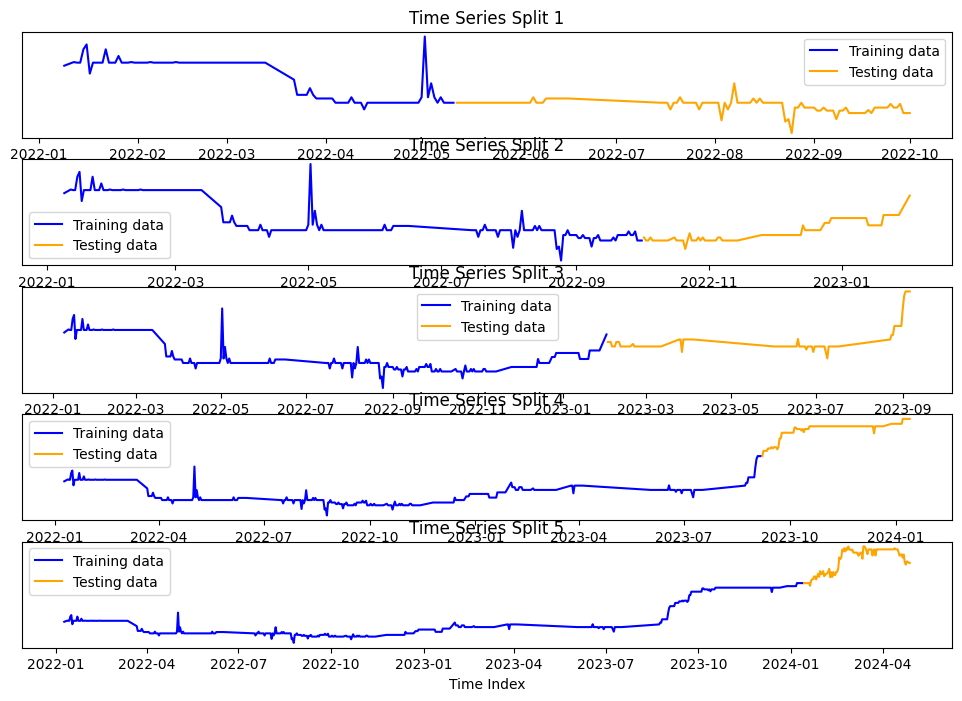

In [96]:
figure, axs = plt.subplots(tscv.get_n_splits(), 1, figsize=(12, 8))
for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
    # plot the splits
    axs[i].plot(y_train.iloc[train_index], label='Training data', color='blue')
    axs[i].plot(y_train.iloc[test_index], label='Testing data', color='orange')
    # axs[i].scatter(X_train.index[test_index], np.ones(len(test_index)), color='red', label='Current test split')
    axs[i].set_title(f'Time Series Split {i+1}')
    axs[i].set_yticks([])
    axs[i].set_xlabel('Time Index')
    axs[i].legend()

Do cross validation to see the model performance

In [97]:
from xgboost import XGBRegressor

for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
    # print(f"Fold {i}:")
    # print(f"  Train: index={train_index}")
    # print(f"  Test:  index={test_index}")
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    RANDOM_STATE = 27
    xgb_model_cv = XGBRegressor(random_state = RANDOM_STATE)
    xgb_fit_cv = xgb_model_cv.fit(X_train_cv, y_train_cv)
    xgb_predict_cv = xgb_fit_cv.predict(X_test_cv)
    eval_metric(y_test_cv, xgb_predict_cv, f"Fold {i+1}")

For Fold 1: RMSE is 93.92527885405771, MAE is 58.82352828979492, Relative MAE is 0.568149526121535
For Fold 2: RMSE is 65.3619504781834, MAE is 41.61955261230469, Relative MAE is 0.4007925194916048
For Fold 3: RMSE is 241.3175018906627, MAE is 176.74073791503906, Relative MAE is 1.6310101571821212
For Fold 4: RMSE is 966.961478033122, MAE is 908.1159057617188, Relative MAE is 7.165620180532953
For Fold 5: RMSE is 1389.5544249866573, MAE is 1238.8695068359375, Relative MAE is 8.698189644421733


Train and evaluate the model

In [98]:
RANDOM_STATE = 27
xgb_model = XGBRegressor(random_state = RANDOM_STATE)
xgb_fit = xgb_model.fit(X_train, y_train)
xgb_predict = xgb_fit.predict(X_test)

In [99]:
eval_metric(y_test, xgb_predict, 'XGBoost')

For XGBoost: RMSE is 195.59186021215197, MAE is 152.45587158203125, Relative MAE is 1.1036588372073888


In [100]:
df_xgb_predict = pd.DataFrame(xgb_predict, index=y_test.index, columns=['XGBoost_Predict'])

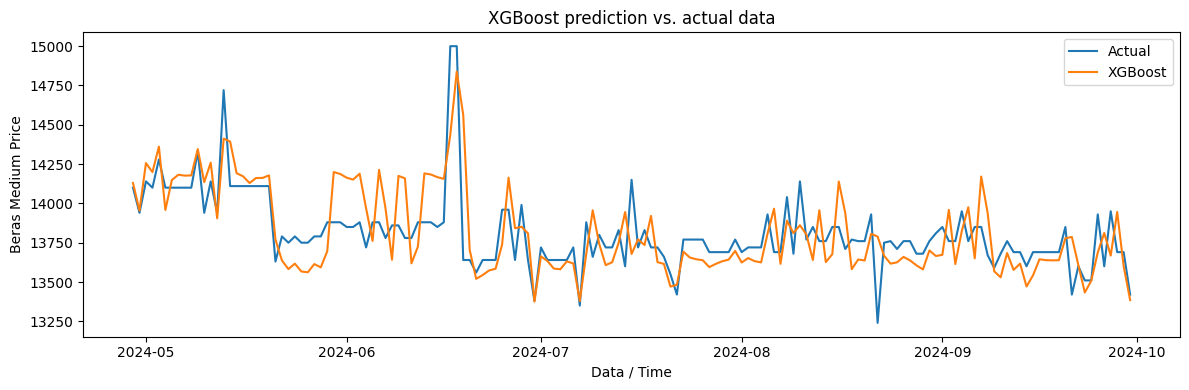

In [101]:
plt.figure().set_size_inches(12, 4)
plt.plot(y_test, label='Actual')
plt.plot(df_xgb_predict, label='XGBoost')
plt.title('XGBoost prediction vs. actual data')
plt.ylabel('Beras Medium Price')
plt.xlabel('Data / Time')
plt.legend()
plt.tight_layout()
plt.show()

In [102]:
from scipy import stats

def resid_plot(model, label):
    resid = y_test.values.ravel() - model.values.ravel()
    plt.figure().set_size_inches(6, 6)
    plt.scatter(model.values.ravel(), resid)
    plt.axhline(0, ls='--', color='gray')
    plt.ylabel("Residual")
    plt.xlabel("Predicted Air Temperature")
    plt.title(f"Residuals vs Predicted ({label})")
    plt.tight_layout()
    plt.show()

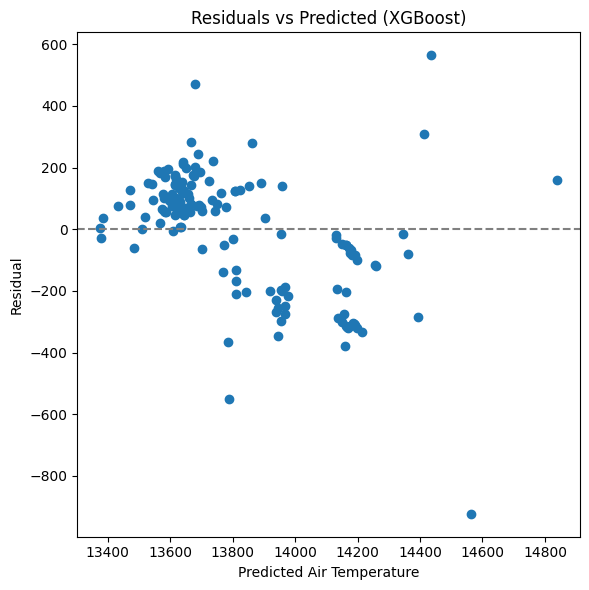

In [103]:
resid_plot(df_xgb_predict, "XGBoost")

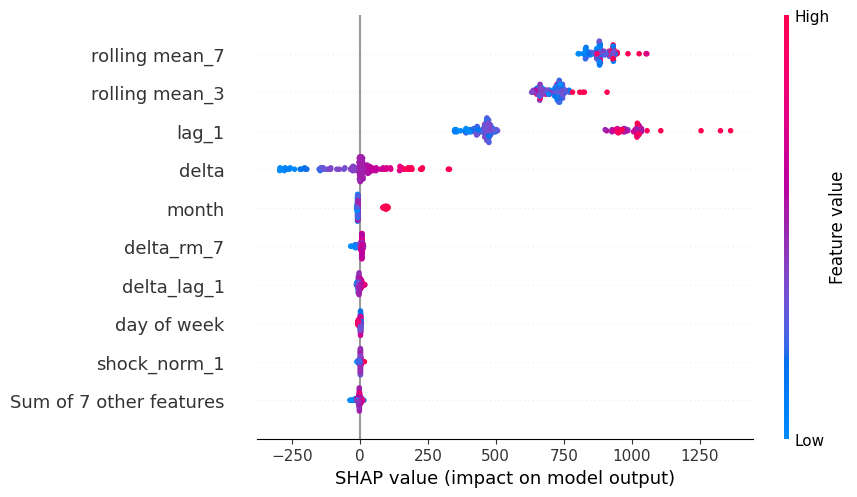

In [104]:
import shap
explainer = shap.TreeExplainer(xgb_fit)
shap.plots.beeswarm(explainer(X_test))

We could see the model performance is increasing from 5.5% using ARIMA to 1,1% using XGBoost with augmented/engineered features. From the SHAP plot we could also see that the main factor that determines the price is `rolling_mean_window` that explains the local regime of price, `lag_1` yesterday price, and `delta` which is the price velocity.

Now let's add external variables like the foreign exchange price and crude oil price to see whether it has a significant impact and how it affects model prediction.

In [56]:
fx_base = os.path.join(path, "Mata Uang")

fx = {}

for file in os.listdir(fx_base):
    # commodity_path = os.path.join(fx_base, commodity)
    # for file in os.listdir(commodity_path):
        # print(file)
    if file.endswith(".csv"):
        filename = file[:-4]
        fx[filename] = pd.read_csv(
            os.path.join(fx_base, file)
        )

fx.keys()

dict_keys(['SGDUSD=X', 'USDIDR=X', 'MYRUSD=X', 'THBUSD=X'])

In [57]:
fx["USDIDR=X"].head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2022-01-03,14215.000000,14215.000000,14301.299805,14207.500000,14246.000000,0
1,2022-01-04,14283.599609,14283.599609,14383.299805,14259.000000,14303.700195,0
2,2022-01-05,14385.500000,14385.500000,14398.500000,14336.700195,14346.400391,0
3,2022-01-06,14446.500000,14446.500000,14445.799805,14351.000000,14445.799805,0
4,2022-01-07,14408.000000,14408.000000,14408.000000,14320.500000,14408.000000,0


In [58]:
usd_idr = fx["USDIDR=X"].drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
usd_idr["Date"] = pd.to_datetime(usd_idr["Date"])
usd_idr = usd_idr.set_index("Date")
usd_idr = usd_idr.asfreq('D')
usd_idr = usd_idr.ffill()

In [59]:
usd_idr.head()

,Close
Date,
2022-01-03,14215.000000
2022-01-04,14283.599609
2022-01-05,14385.500000
2022-01-06,14446.500000
2022-01-07,14408.000000


In [60]:
thb_usd = fx["THBUSD=X"].drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
thb_usd["Date"] = pd.to_datetime(thb_usd["Date"])
thb_usd = thb_usd.set_index("Date")
thb_usd = thb_usd.asfreq('D')
thb_usd = thb_usd.ffill()

In [61]:
thb_usd.head()

,Close
Date,
2022-01-03,0.030201
2022-01-04,0.030082
2022-01-05,0.030083
2022-01-06,0.030077
2022-01-07,0.029804


In [62]:
# make thb_idr from thb_usd and usd_idr
thb_idr = thb_usd.copy()
thb_idr = thb_idr.merge(usd_idr[['Close']].rename(columns={'Close': 'USDIDR_Close'}), left_index=True, right_index=True, how='left')
thb_idr['THBIDR_Close'] = thb_idr['Close'] * thb_idr['USDIDR_Close']
thb_idr = thb_idr[['THBIDR_Close']]
thb_idr.head()

,THBIDR_Close
Date,
2022-01-03,429.313532
2022-01-04,429.672412
2022-01-05,432.763749
2022-01-06,434.507315
2022-01-07,429.410164


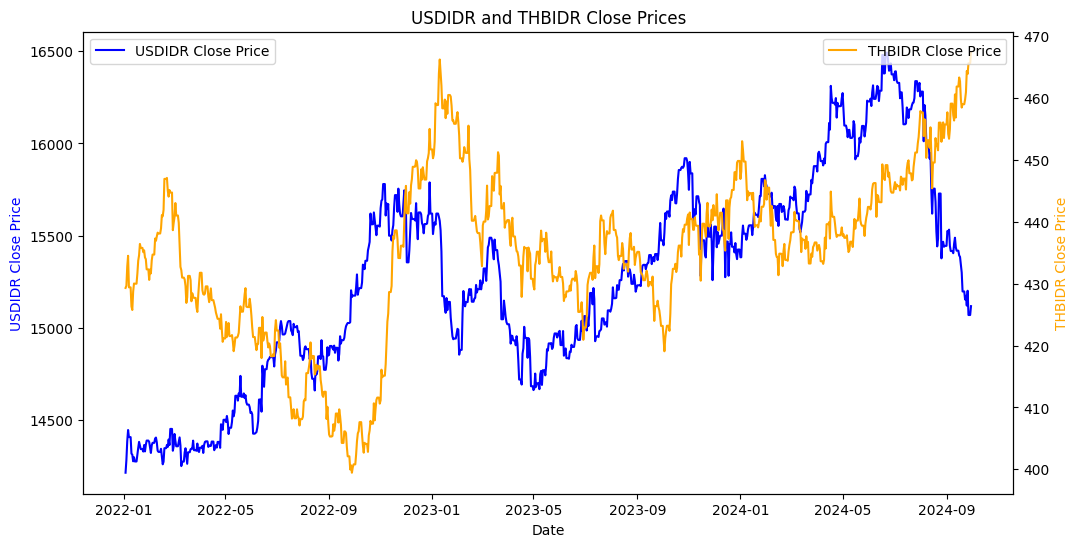

In [63]:
# plot thb_usd and usd_idr in the same figure with 2 y axis
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(usd_idr.index, usd_idr['Close'], color='blue', label='USDIDR Close Price')
ax2.plot(thb_idr.index, thb_idr['THBIDR_Close'], color='orange', label='THBIDR Close Price')
ax1.set_ylabel('USDIDR Close Price', color='blue')
ax2.set_ylabel('THBIDR Close Price', color='orange')
ax1.set_xlabel('Date')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('USDIDR and THBIDR Close Prices')
plt.show()

In [64]:
gl_base = os.path.join(path, "Global Commodity Price")

gl = {}

for file in os.listdir(gl_base):
    # commodity_path = os.path.join(gl_base, commodity)
    # for file in os.listdir(commodity_path):
        # print(file)
    if file.endswith(".csv"):
        filename = file[:-4]
        gl[filename] = pd.read_csv(
            os.path.join(gl_base, file)
        )

gl.keys()

dict_keys(['US Sugar 11 Futures Historical Data', 'Natural Gas Futures Historical Data', 'Newcastle Coal Futures Historical Data', 'Palm Oil Futures Historical Data', 'US Wheat Futures Historical Data', 'Crude Oil WTI Futures Historical Data'])

In [65]:
gl["Crude Oil WTI Futures Historical Data"].head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-09-30,67.77,68.08,68.83,67.14,189.29K,0.15%
1,2024-09-27,67.67,66.95,68.13,66.58,169.90K,0.71%
2,2024-09-26,67.19,69.30,69.47,66.49,274.69K,-2.81%
3,2024-09-25,69.13,70.84,71.04,68.69,272.17K,-2.41%
4,2024-09-24,70.84,69.96,71.60,69.69,167.02K,1.77%


In [66]:
crude_oil = gl["Crude Oil WTI Futures Historical Data"].drop(columns=['Open', 'High', 'Low', 'Change %', 'Vol.'])
crude_oil["Date"] = pd.to_datetime(crude_oil["Date"])
crude_oil = crude_oil.set_index("Date")
crude_oil = crude_oil.asfreq('D')
crude_oil = crude_oil.ffill()

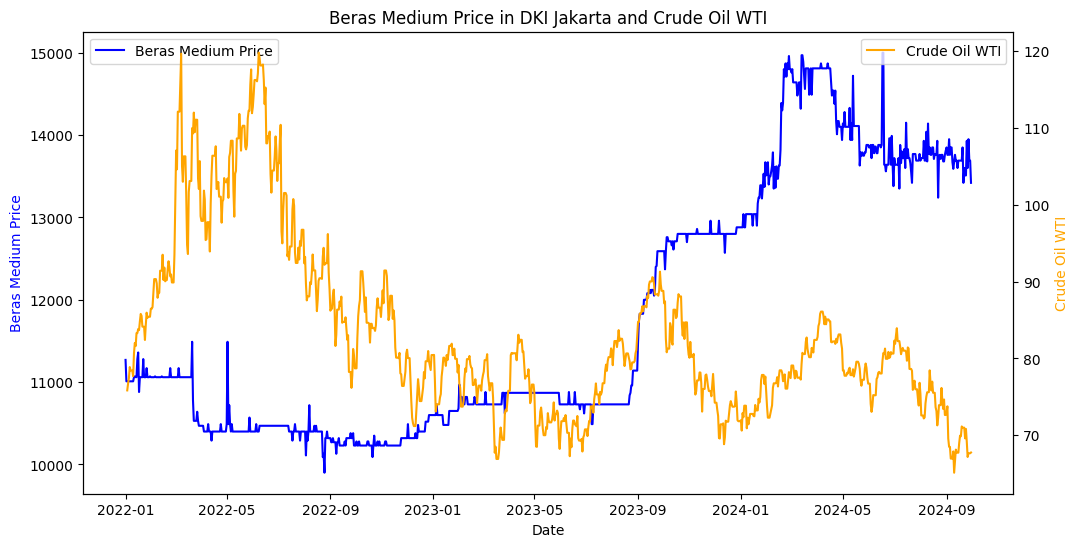

In [67]:
# plot the google trend of beras in DKI Jakarta
# make it have 2 y axis
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(df.index, df['DKI Jakarta'], color='blue', label='Beras Medium Price')
ax2.plot(crude_oil.index, crude_oil["Price"], color='orange', label='Crude Oil WTI')
ax1.set_ylabel('Beras Medium Price', color='blue')
ax2.set_ylabel('Crude Oil WTI', color='orange')
ax1.set_xlabel('Date')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Beras Medium Price in DKI Jakarta and Crude Oil WTI')
plt.show()

Here, we will use new variables which are:
- `delta_fx_usd` (velocity of USD - IDR exchange)
- `delta_fx_thb` (velocity of THB - IDR exchange)
- `delta_crude_oil` (velocity of crude oil price)

and also those 3 rolling mean and std

In [105]:
Xy = df.copy()

Xy = Xy.merge(usd_idr[['Close']].rename(columns={'Close': 'USDIDR_Close'}), left_index=True, right_index=True, how='left')
Xy = Xy.merge(thb_idr[['THBIDR_Close']], left_index=True, right_index=True, how='left')
Xy = Xy.merge(crude_oil[['Price']].rename(columns={'Price': 'Crude_Oil_WTI_Price'}), left_index=True, right_index=True, how='left')

for lag in range(1, 2):
    Xy[f"lag_{lag}"] = Xy['DKI Jakarta'].shift(lag)
Xy["delta"] = Xy["DKI Jakarta"].diff()
Xy["delta_lag_1"] = Xy["delta"].shift(1)
Xy["delta_lag_2"] = Xy["delta"].shift(2)

Xy["delta_fx_usd"] = Xy["USDIDR_Close"].diff()
Xy["delta_fx_thb"] = Xy["THBIDR_Close"].diff()

Xy["delta_crude_oil"] = Xy["Crude_Oil_WTI_Price"].diff()

for win in (3, 7):
    Xy[f"rolling mean_{win}"] = Xy['DKI Jakarta'].shift(1).rolling(win).mean()
    Xy[f"rolling std_{win}"] = Xy['DKI Jakarta'].shift(1).rolling(win).std()

    Xy[f"delta_rm_{win}"] = Xy["delta"].shift(1).rolling(win).mean()
    Xy[f"delta_rs_{win}"] = Xy["delta"].shift(1).rolling(win).std()

    Xy[f"crude_oil_rm_{win}"] = Xy["Crude_Oil_WTI_Price"].shift(1).rolling(win).mean()
    Xy[f"crude_oil_rs_{win}"] = Xy["Crude_Oil_WTI_Price"].shift(1).rolling(win).std()

    Xy[f"fx_usdidr_rm_{win}"] = Xy["delta_fx_usd"].shift(1).rolling(win).mean()
    Xy[f"fx_usdidr_rs_{win}"] = Xy["delta_fx_usd"].shift(1).rolling(win).std()

    Xy[f"fx_thbidr_rm_{win}"] = Xy["delta_fx_thb"].shift(1).rolling(win).mean()
    Xy[f"fx_thbidr_rs_{win}"] = Xy["delta_fx_thb"].shift(1).rolling(win).std()

Xy["shock_1"] = Xy["delta_lag_1"].abs()
Xy["shock_norm_1"] = Xy["delta_lag_1"] / Xy["delta_rs_7"]

Xy[f"day of week"] = Xy.index.dayofweek
Xy[f"month"] = Xy.index.month

Xy = Xy.dropna()

In [106]:
Xy.head()

,DKI Jakarta,USDIDR_Close,THBIDR_Close,Crude_Oil_WTI_Price,lag_1,delta,delta_lag_1,delta_lag_2,delta_fx_usd,delta_fx_thb,...,crude_oil_rm_7,crude_oil_rs_7,fx_usdidr_rm_7,fx_usdidr_rs_7,fx_thbidr_rm_7,fx_thbidr_rs_7,shock_1,shock_norm_1,day of week,month
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-12,11070.0,14277.000000,428.713007,82.02,11060.0,10.0,50.0,0.0,-36.000000,2.958940,...,78.577143,1.042700,4.200056,62.588546,-0.559763,2.775963,50.0,2.645751,2,1
2022-01-13,11060.0,14298.900391,430.029184,81.62,11070.0,-10.0,10.0,50.0,21.900391,1.316177,...,79.227143,1.538037,-15.500000,46.292548,-0.578677,2.747243,10.0,0.536350,3,1
2022-01-14,11060.0,14276.000000,429.999984,83.30,11060.0,0.0,-10.0,10.0,-22.900391,-0.029200,...,79.618571,1.766639,-21.085658,36.937204,-0.639733,2.691208,10.0,-0.506061,4,1
2022-01-15,11280.0,14276.000000,429.999984,83.30,11060.0,220.0,0.0,-10.0,0.000000,0.000000,...,80.312857,2.141485,-18.857143,36.174144,0.084260,1.838959,0.0,0.000000,5,1
2022-01-16,11360.0,14276.000000,429.999984,83.83,11280.0,80.0,220.0,0.0,0.000000,0.000000,...,81.007143,2.219495,-18.857143,36.174144,0.084260,1.838959,220.0,2.671636,6,1


In [107]:
Xy = Xy.drop(columns=['USDIDR_Close', 'THBIDR_Close', 
                      'Crude_Oil_WTI_Price',
                      ])
Xy.head()

,DKI Jakarta,lag_1,delta,delta_lag_1,delta_lag_2,delta_fx_usd,delta_fx_thb,delta_crude_oil,rolling mean_3,rolling std_3,...,crude_oil_rm_7,crude_oil_rs_7,fx_usdidr_rm_7,fx_usdidr_rs_7,fx_thbidr_rm_7,fx_thbidr_rs_7,shock_1,shock_norm_1,day of week,month
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-12,11070.0,11060.0,10.0,50.0,0.0,-36.000000,2.958940,1.35,11026.666667,28.867513,...,78.577143,1.042700,4.200056,62.588546,-0.559763,2.775963,50.0,2.645751,2,1
2022-01-13,11060.0,11070.0,-10.0,10.0,50.0,21.900391,1.316177,-0.40,11046.666667,32.145503,...,79.227143,1.538037,-15.500000,46.292548,-0.578677,2.747243,10.0,0.536350,3,1
2022-01-14,11060.0,11060.0,0.0,-10.0,10.0,-22.900391,-0.029200,1.68,11063.333333,5.773503,...,79.618571,1.766639,-21.085658,36.937204,-0.639733,2.691208,10.0,-0.506061,4,1
2022-01-15,11280.0,11060.0,220.0,0.0,-10.0,0.000000,0.000000,0.00,11063.333333,5.773503,...,80.312857,2.141485,-18.857143,36.174144,0.084260,1.838959,0.0,0.000000,5,1
2022-01-16,11360.0,11280.0,80.0,220.0,0.0,0.000000,0.000000,0.53,11133.333333,127.017059,...,81.007143,2.219495,-18.857143,36.174144,0.084260,1.838959,220.0,2.671636,6,1


In [108]:
y = Xy['DKI Jakarta']
X = Xy.drop(columns='DKI Jakarta')

y = y.to_frame()

In [109]:
split_point = int(len(Xy) * 0.8)

X_train, X_test, y_train, y_test = X[:split_point], X[split_point:], y[:split_point], y[split_point:]

In [110]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [111]:
from xgboost import XGBRegressor

for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
    # print(f"Fold {i}:")
    # print(f"  Train: index={train_index}")
    # print(f"  Test:  index={test_index}")
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    RANDOM_STATE = 27
    xgb_model_cv = XGBRegressor(random_state = RANDOM_STATE)
    xgb_fit_cv = xgb_model_cv.fit(X_train_cv, y_train_cv)
    xgb_predict_cv = xgb_fit_cv.predict(X_test_cv)
    eval_metric(y_test_cv, xgb_predict_cv, f"Fold {i+1}")

For Fold 1: RMSE is 109.76134444500487, MAE is 81.7127456665039, Relative MAE is 0.789315686306362
For Fold 2: RMSE is 89.95875248377725, MAE is 62.08223342895508, Relative MAE is 0.5975416432099777
For Fold 3: RMSE is 237.04828753863632, MAE is 150.76904296875, Relative MAE is 1.390066290896087
For Fold 4: RMSE is 988.9267225128463, MAE is 932.7864379882812, Relative MAE is 7.353403458961007
For Fold 5: RMSE is 1397.617481645103, MAE is 1253.66259765625, Relative MAE is 8.795635319187078


In [112]:
RANDOM_STATE = 27
xgb_model = XGBRegressor(random_state = RANDOM_STATE)
xgb_fit = xgb_model.fit(X_train, y_train)
xgb_predict = xgb_fit.predict(X_test)

In [113]:
eval_metric(y_test, xgb_predict, 'XGBoost')

For XGBoost: RMSE is 186.93962093414012, MAE is 142.11996459960938, Relative MAE is 1.0289736132401126


In [114]:
df_xgb_predict = pd.DataFrame(xgb_predict, index=y_test.index, columns=['XGBoost_Predict'])

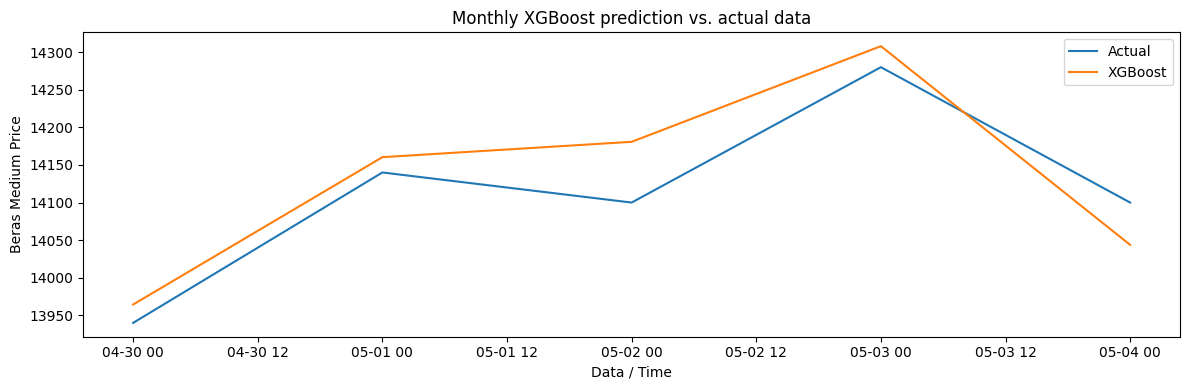

In [115]:
plt.figure().set_size_inches(12, 4)
plt.plot(y_test[:5], label='Actual')
plt.plot(df_xgb_predict[:5], label='XGBoost')
plt.title('Monthly XGBoost prediction vs. actual data')
plt.ylabel('Beras Medium Price')
plt.xlabel('Data / Time')
plt.legend()
plt.tight_layout()
plt.show()

We could see that prediction in short period do reflect the test data quite good, but it tends to overshoot by some degree.

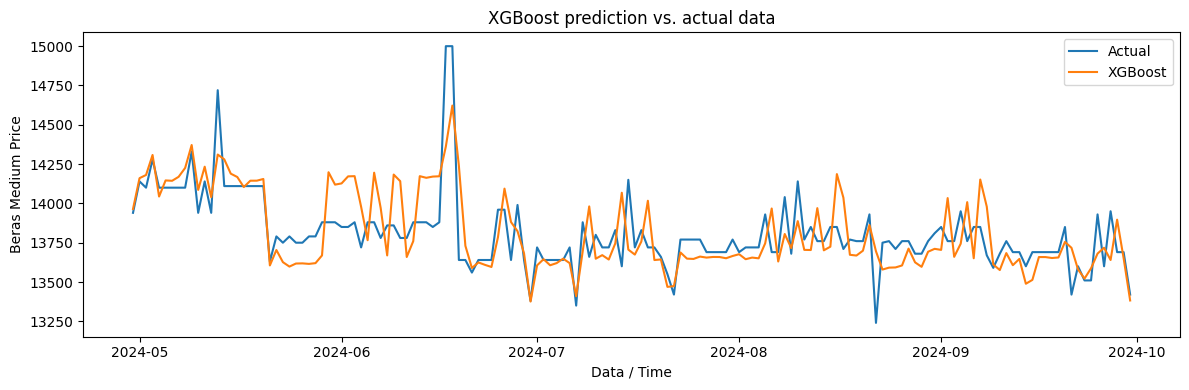

In [116]:
plt.figure().set_size_inches(12, 4)
plt.plot(y_test, label='Actual')
plt.plot(df_xgb_predict, label='XGBoost')
plt.title('XGBoost prediction vs. actual data')
plt.ylabel('Beras Medium Price')
plt.xlabel('Data / Time')
plt.legend()
plt.tight_layout()
plt.show()

In the long run however, we could see that the model did not manage to capture the price extremeity and tends to overshoot and undershoot the predicted price in some area.

In [117]:
xgb_train_predict = xgb_fit.predict(X_train)
xgb_test_predict = xgb_fit.predict(X_test)

In [118]:
df_xgb_test = pd.DataFrame(xgb_test_predict, index=y_test.index, columns=['XGBoost_Predict'])
df_xgb_train = pd.DataFrame(xgb_train_predict, index=y_train.index, columns=['XGBoost_Predict'])

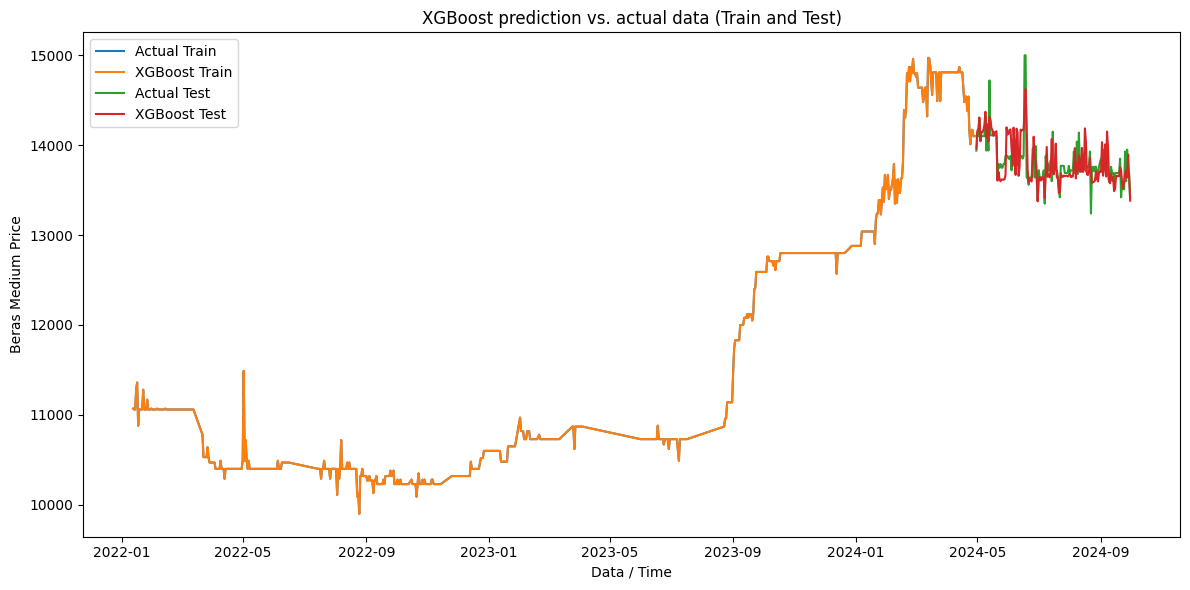

In [119]:
# plot predicted and original train and test

plt.figure().set_size_inches(12, 6)
plt.plot(y_train, label='Actual Train')
plt.plot(df_xgb_train, label='XGBoost Train')
plt.plot(y_test, label='Actual Test')
plt.plot(df_xgb_test, label='XGBoost Test')
plt.title('XGBoost prediction vs. actual data (Train and Test)')
plt.ylabel('Beras Medium Price')
plt.xlabel('Data / Time')
plt.legend()
plt.tight_layout()
plt.show()

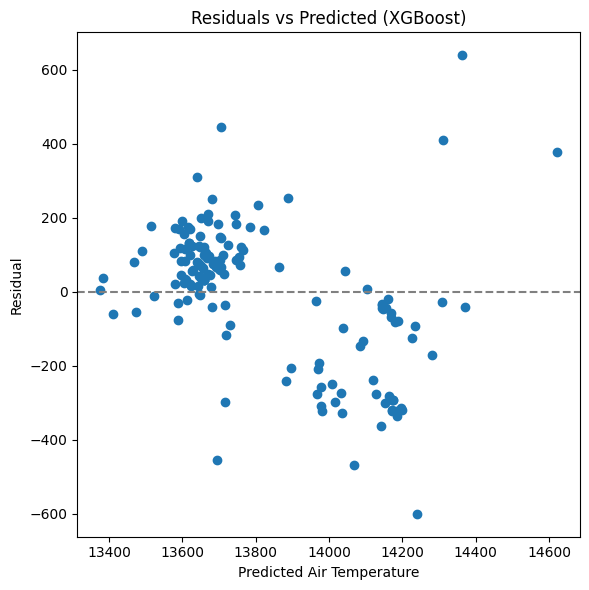

In [120]:
resid_plot(df_xgb_predict, "XGBoost")

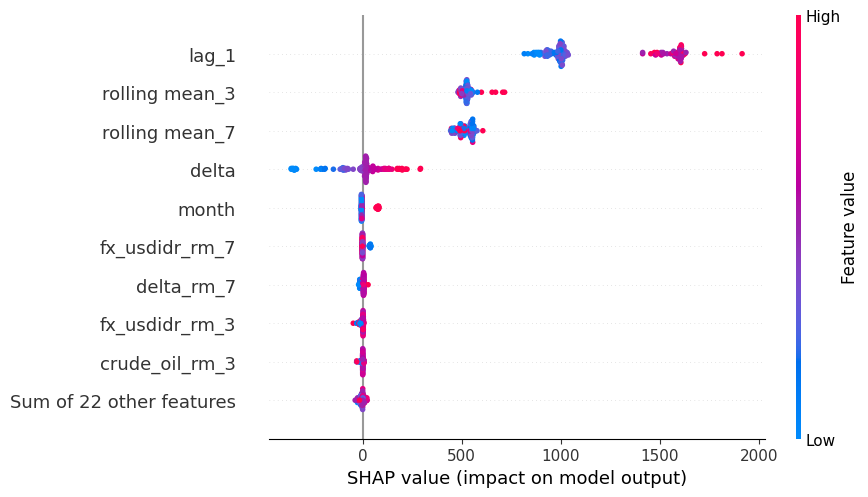

In [121]:
import shap
explainer = shap.TreeExplainer(xgb_fit)
shap.plots.beeswarm(explainer(X_test))

We could see an improvement in model prediction which reduces the Relative MAE from 1,1% to 1.0%. From the SHAP plot we could also see now that the main factor that affect the price prediction is `lag_1` (yesterday price), `rolling_mean_window` (local regime), and `delta` (price velocity). We could observe that foreign exchange and crude oil price do affect the prediction but not as significant as those three. Here, the external factor such as the crude oil could be interpreted as "matter" indirectly (like affecting transport/fertilizer prices/availability) as an secondary effect. Moreover, we could also interpret that the forex value is not a primary driver of daily price fluctuation, but in a secondary term as an affector of import parity (in import case). We could conclude that **the model is learning internal price dynamics quite well, internal momentum dominates rather than external factors such as crude oil price and forex.**

We could also see that the model performs weaker when there extreme regime changes. Hence it may be beneficial to include features that can capture such regime changes better or use a piece-wise prediction rather than a one shot prediction.